# Measurements of Relativistic Corrections

Start in the appropriate notebook directory.

In [1]:
# %cd /mnt/lustre/mikewang/projects/HorizonGRound/notebooks/

Set up the appropriate paths.

In [2]:
import os, sys

current_file_dir = os.getcwd()
sys.path.insert(0, "".join([current_file_dir, "/../"]))
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

from config.program import SciFormatter, data_dir, stylesheet

publication_dir = data_dir/"output"/"publication"

Import the appropriate packages.

In [3]:
import glob
import re
from collections import defaultdict

import corner
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from nbodykit.cosmology import Planck15

from horizonground.clustering_modification import relativistic_correction_value

plt.style.use(stylesheet)

## Relativistic correction quantiles

Load samples of the relativistic correction contributions at densly sampled redshifts and determine their quantiles.

In [4]:
quantile_levels = [0.022750, 0.158655, 0.5, 0.841345, 0.977250]

In [5]:
dense_redshifts = []
gz_quantiles = defaultdict(list)
for chain_file in sorted(
        glob.glob("/".join([str(publication_dir), "dense_points", "correction", "relcrct_z*"]))
    ):
    dense_redshifts.append(float(
        re.search("_z(?P<redshift>.*?)_", chain_file).group('redshift')
    ))
    with h5py.File(chain_file, 'r') as chain_data:
        distilled = chain_data['distill/chain'][()]
        gz_q = corner.quantile(distilled[:], q=quantile_levels)
    for sigma_level_idx, sigma_level in enumerate([-2, -1, 0, 1, 2]):
        gz_quantiles[sigma_level].append(gz_q[sigma_level_idx])

In [6]:
dense_redshifts = []
gz_evol_quantiles = defaultdict(list)
for chain_file in sorted(
        glob.glob("/".join([str(publication_dir), "dense_points", "correction", "relcrct_evol_z*"]))
    ):
    dense_redshifts.append(float(
        re.search("_z(?P<redshift>.*?)_", chain_file).group('redshift')
    ))
    with h5py.File(chain_file, 'r') as chain_data:
        distilled = chain_data['distill/chain'][()]
        gz_evol_q = corner.quantile(distilled[:], q=quantile_levels)
    for sigma_level_idx, sigma_level in enumerate([-2, -1, 0, 1, 2]):
        gz_evol_quantiles[sigma_level].append(gz_evol_q[sigma_level_idx])

In [7]:
dense_redshifts = []
gz_magn_quantiles = defaultdict(list)
for chain_file in sorted(
        glob.glob("/".join([str(publication_dir), "dense_points", "correction", "relcrct_magn_z*"]))
    ):
    dense_redshifts.append(float(
        re.search("_z(?P<redshift>.*?)_", chain_file).group('redshift')
    ))
    with h5py.File(chain_file, 'r') as chain_data:
        distilled = chain_data['distill/chain'][()]
        gz_magn_q = corner.quantile(distilled[:], q=quantile_levels)
    for sigma_level_idx, sigma_level in enumerate([-2, -1, 0, 1, 2]):
        gz_magn_quantiles[sigma_level].append(gz_magn_q[sigma_level_idx])

In [8]:
discontinuity_pos = np.searchsorted(dense_redshifts, 2.2)

if dense_redshifts[discontinuity_pos] == 2.2:
    del dense_redshifts[discontinuity_pos]
    for sigma_level in evolution_bias_quantiles:
        del gz_evol_quantiles[sigma_level][discontinuity_pos]
        del gz_magn_quantiles[sigma_level][discontinuity_pos]

low_redshift_part = slice(0, discontinuity_pos)
high_redshift_part = slice(discontinuity_pos, None)

## Relativistic correction measurements

Load samples of the relativistic correction contributions in eBOSS QSO LF redshift bins and determine the estimates with uncertainties.

In [9]:
# estimate_levels = [0.158655, 0.5, 0.841345]

In [10]:
# measured_redshifts = []
# gz_estimates = defaultdict(list)
# for chain_file in sorted(
#         glob.glob("/".join([str(publication_dir), "eBOSS_binning", "relcrct_z*"]))
#     ):
#     measured_redshifts.append(float(
#         re.search("_z(?P<redshift>.*?)_", chain_file).group('redshift')
#     ))
#     with h5py.File(chain_file, 'r') as chain_data:
#         distilled = chain_data['distill/chain'][()]
#         gz_e = corner.quantile(distilled[:], q=estimate_levels)
#     for sigma_level_idx, sigma_level in enumerate([-1, 0, 1]):
#         gz_estimates[sigma_level].append(gz_e[sigma_level_idx])

In [11]:
# measured_redshifts = []
# gz_evol_estimates = defaultdict(list)
# for chain_file in sorted(
#         glob.glob("/".join([str(publication_dir), "eBOSS_binning", "relcrct_evol_z*"]))
#     ):
#     measured_redshifts.append(float(
#         re.search("_z(?P<redshift>.*?)_", chain_file).group('redshift')
#     ))
#     with h5py.File(chain_file, 'r') as chain_data:
#         distilled = chain_data['distill/chain'][()]
#         gz_evol_e = corner.quantile(distilled[:], q=estimate_levels)
#     for sigma_level_idx, sigma_level in enumerate([-1, 0, 1]):
#         gz_evol_estimates[sigma_level].append(gz_evol_e[sigma_level_idx])

In [12]:
# measured_redshifts = []
# gz_magn_estimates = defaultdict(list)
# for chain_file in sorted(
#         glob.glob("/".join([str(publication_dir), "eBOSS_binning", "relcrct_magn_z*"]))
#     ):
#     measured_redshifts.append(float(
#         re.search("_z(?P<redshift>.*?)_", chain_file).group('redshift')
#     ))
#     with h5py.File(chain_file, 'r') as chain_data:
#         distilled = chain_data['distill/chain'][()]
#         gz_magn_e = corner.quantile(distilled[:], q=estimate_levels)
#     for sigma_level_idx, sigma_level in enumerate([-1, 0, 1]):
#         gz_magn_estimates[sigma_level].append(gz_magn_e[sigma_level_idx])

## Relativistic  contribution constraints

Compute the background relativistic corrections.

In [13]:
background_corrections = np.asarray([
    relativistic_correction_value(z, cosmo=Planck15) for z in dense_redshifts
])

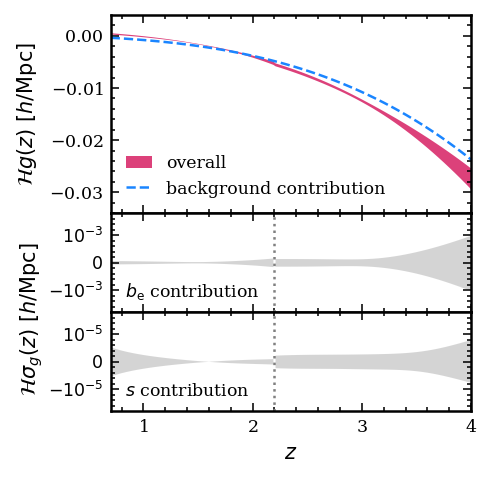

In [14]:
ALPHA = 0.5

fig = plt.figure("relativistic correction contributions", figsize=(3.1, 3.5), dpi=150)

overall = plt.subplot2grid((4, 1), (0, 0), rowspan=2)

overall.fill_between(
    dense_redshifts, np.asarray(gz_quantiles[-2]), np.asarray(gz_quantiles[2]),
    facecolor='#D41159', alpha=0.8, label='overall'
)
overall.plot(
    dense_redshifts, background_corrections, 
    ls='--', c='#1A85FF', label='background contribution'
)

handles, labels = overall.get_legend_handles_labels()

overall.legend(reversed(handles), reversed(labels), handlelength=1.5)
overall.tick_params(axis='x', which='both', labelbottom=False)
overall.set_yticks(np.arange(-0.05, 0.05, step=0.01))
overall.xaxis.set_minor_locator(AutoMinorLocator())
overall.yaxis.set_minor_locator(AutoMinorLocator())
overall.set_xlim(min(dense_redshifts), max(dense_redshifts))
overall.set_ylim(-0.034, 0.004)
overall.set_ylabel(r"$\mathcal{H} g(z)\ [h/\mathrm{Mpc}]$", labelpad=5)

# Evolution uncertainty contribution

uncertainty_evol = plt.subplot2grid((4, 1), (2, 0), sharex=overall)

for idx, part in enumerate([low_redshift_part, high_redshift_part]):
    uncertainty_evol.fill_between(
        dense_redshifts[part], 
        np.subtract(gz_evol_quantiles[-1], gz_evol_quantiles[0])[part],
        np.subtract(gz_evol_quantiles[1], gz_evol_quantiles[0])[part],
        facecolor='0.67', alpha=ALPHA, zorder=1,
    )
    
uncertainty_evol.axvline(x=2.2, ls=':', c='0.5')

uncertainty_evol.set_title(
    r'$b_\mathrm{e}$ contribution', 
    loc='left', position=(0.04, 0.025), fontsize='small'
)
uncertainty_evol.tick_params(axis='x', which='both', labelbottom=False)
uncertainty_evol.set_yticks(np.arange(-2.e-3, 2.e-3, step=1.e-3))
uncertainty_evol.yaxis.set_major_formatter(SciFormatter("%1.0e"))
uncertainty_evol.yaxis.set_minor_locator(AutoMinorLocator())
uncertainty_evol.set_ylim(-1.8e-3, 1.8e-3)

# Magnification uncertainty contribution

uncertainty_magn = plt.subplot2grid((4, 1), (3, 0), sharex=overall)

for idx, part in enumerate([low_redshift_part, high_redshift_part]):
    uncertainty_magn.fill_between(
        dense_redshifts[part],
        np.subtract(gz_magn_quantiles[-1], gz_magn_quantiles[0])[part],
        np.subtract(gz_magn_quantiles[1], gz_magn_quantiles[0])[part],
        facecolor='0.67', alpha=ALPHA, zorder=1
    )

uncertainty_magn.axvline(x=2.2, ls=':', c='0.5')

uncertainty_magn.set_title(
    r'$s$ contribution', 
    loc='left', position=(0.04, 0.025), fontsize='small'
)
uncertainty_magn.set_yticks(np.arange(-2.e-5, 2.e-5, step=1.e-5))
uncertainty_magn.yaxis.set_major_formatter(SciFormatter("%1.0e"))
uncertainty_magn.yaxis.set_minor_locator(AutoMinorLocator())
uncertainty_magn.set_ylim(-1.8e-5, 1.8e-5)
uncertainty_magn.set_xlabel(r"$z$")

fig.text(
    -0.045, 0.3, r"$\mathcal{H} \sigma_g(z)\ [h/\mathrm{Mpc}]$", 
    ha='center', va='center', rotation='vertical'
)
fig.savefig(publication_dir/"gallery"/"relativistic_correction_breakdown.pdf")